In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scipy
import time
import uuid

import matplotlib.pyplot as plt
import networkx as nx

from SPARQLWrapper import SPARQLWrapper, JSON, POST

from req_analysis import *

# Initialize connection to Neptune

In [3]:
%run 'req_analysis/neptune-util.py'
%env NEPTUNE_CLUSTER_ENDPOINT=100.65.51.106
%env NEPTUNE_CLUSTER_PORT=8182
g = neptune.graphTraversal()

env: NEPTUNE_CLUSTER_ENDPOINT=100.65.51.106
env: NEPTUNE_CLUSTER_PORT=8182
gremlin: ws://100.65.51.106:8182/gremlin


# Query strings

## Get queries

In [4]:
query_elements = """prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix owl: <http://www.w3.org/2002/07/owl#>
prefix xsd: <http://www.w3.org/2001/XMLSchema#>
prefix xml: <http://www.w3.org/XML/1998/namespace/>
prefix mms-ontology: <https://opencae.jpl.nasa.gov/mms/rdf/ontology/>
prefix mms-graph: <https://opencae.jpl.nasa.gov/mms/rdf/graph/>
prefix mms-property: <https://opencae.jpl.nasa.gov/mms/rdf/property/>
prefix mms-class: <https://opencae.jpl.nasa.gov/mms/rdf/class/>
prefix mms-element: <https://opencae.jpl.nasa.gov/mms/rdf/element/>
prefix mms-artifact: <https://opencae.jpl.nasa.gov/mms/rdf/artifact/>
prefix mms-index: <https://opencae.jpl.nasa.gov/mms/rdf/index/>
prefix xmi: <http://www.omg.org/spec/XMI/20131001#>
prefix uml: <http://www.omg.org/spec/UML/20161101#>
prefix uml-model: <https://www.omg.org/spec/UML/20161101/UML.xmi#>
prefix uml-primitives: <https://www.omg.org/spec/UML/20161101/PrimitiveTypes.xmi#>
prefix uml-class: <https://opencae.jpl.nasa.gov/mms/rdf/uml-class/>
prefix uml-property: <https://opencae.jpl.nasa.gov/mms/rdf/uml-property/>

select * from mms-graph:data.tmt {
    ?element a/rdfs:subClassOf* uml-class:Class
    {
        ?element rdfs:label ?label 
    } union {
        ?element mms-property:name ?label
    }
    
    filter(isLiteral(?label) && ?label != "")
}
"""

## Insert queries

In [5]:
insert_blocks = """
<{input_uri}> mms-autocref:reference mms-autocref-i:Reference.{reference_uuid} ;
  .

mms-autocref-i:Reference.{reference_uuid}
  a mms-autocref:Reference ;
  mms-autocref:inputText \"\"\"{input_text}\"\"\" ;
  mms-autocref:match <{match_uri}> ;
  mms-autocref:token mms-autocref-i:Token.{reference_uuid} ;
  .

mms-autocref-i:Token.{reference_uuid}
  a mms-autocref:Token ;
  mms-autocref:tokenStart "{token_position}"^^xsd:integer ;
  mms-autocref:tokenText \"\"\"{token_text}\"\"\" ;
  .
"""

In [6]:
insert_query = """
prefix mms-autocref: <https://opencae.jpl.nasa.gov/mms/rdf/autocref/>
prefix mms-autocref-i: <https://opencae.jpl.nasa.gov/mms/rdf/autocref-instance/>

insert data {{
  graph <https://opencae.jpl.nasa.gov/mms/rdf/graph/autocref.tmt.test> {{
    {insert_blocks}
  }}
}}"""

# Evaluation

In [7]:
sparql = SPARQLWrapper("https://cae-mms-rdf-test-r5-2x.cluster-cw2hjngge6pe.us-gov-west-1.neptune.amazonaws.com:8182/sparql")

In [8]:
ref_targets = ReferenceTarget(sparql)
ref_targets.init_table(query_elements)

== Status Code: 200 ==
1951 reference targets found.


In [13]:
req_evaluator = RequirementEvaluator(sparql)
req_evaluator.init_requirement_elements()

== Status Code: 200 ==
3061 requirements found.


In [ ]:
req_evaluator.evaluate_all_requirements(g, ref_targets, insert_blocks, insert_query, pprint=False)

1 / 1509 --- 0.2871859073638916 s
NO MATCH FOUND evaluation with req:  _1c8745d2-aa73-4371-b35a-bbb0e3124ce9__98_cd3fdddc-d986-4574-ab2b-9bc64eaaf3b6_asi-slot-_18_0_2_b4c02e1_1422576771659_877428_84042-slotvalue-0-literalstring
2 / 1509 --- 0.45852184295654297 s
NO MATCH FOUND evaluation with req:  _4663af6e-6265-438d-87b8-74e1550518bf__6762_4eeaf824-1f0a-4178-933d-8c01771b629d_asi-slot-_18_0_2_b4c02e1_1423073212164_663502_347367-slotvalue-0-literalstring
3 / 1509 --- 0.6321349143981934 s
NO MATCH FOUND evaluation with req:  _4663af6e-6265-438d-87b8-74e1550518bf__6572_1d3dd20d-9283-4015-b8c0-a3dee3fcfbe3_asi-slot-_18_0_2_b4c02e1_1422576771659_877428_84042-slotvalue-0-literalstring
4 / 1509 --- 1.320995807647705 s
NO MATCH FOUND evaluation with req:  _4663af6e-6265-438d-87b8-74e1550518bf__6762_4eeaf824-1f0a-4178-933d-8c01771b629d_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311-slotvalue-0-literalstring


/usr/local/anaconda3/envs/cref/lib/python3.7/site-packages/nltk/cluster/util.py:133: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (numpy.dot(u, v) / (sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


5 / 1509 --- 1.8623926639556885 s
NO MATCH FOUND evaluation with req:  _4663af6e-6265-438d-87b8-74e1550518bf__6572_1d3dd20d-9283-4015-b8c0-a3dee3fcfbe3_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311-slotvalue-0-literalstring
6 / 1509 --- 2.0961458683013916 s
NO MATCH FOUND evaluation with req:  _8f7cabc1-8e5f-4014-8c9c-7ff7b8b98955__1371_1c1dbf6d-afd7-4903-b52a-f560db05995b_asi-slot-_18_0_2_b4c02e1_1422576771659_877428_84042-slotvalue-0-literalstring
7 / 1509 --- 2.2651917934417725 s
NO MATCH FOUND evaluation with req:  _4663af6e-6265-438d-87b8-74e1550518bf__6762_4eeaf824-1f0a-4178-933d-8c01771b629d_asi-slot-_18_0_2_b4c02e1_1422576771659_877428_84042-slotvalue-0-literalstring
8 / 1509 --- 2.9840128421783447 s
NO MATCH FOUND evaluation with req:  _18682_bd1fb593-def7-42f3-a50b-3b55236faee7_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311-slotvalue-0-literalstring
9 / 1509 --- 3.6805808544158936 s
NO MATCH FOUND evaluation with req:  _18682_bd1fb593-def7-42f3-a50b-3b55236

In [23]:
req_list = [
    '_831_331c90b6-9e17-4c46-8530-0fc345e0a22f_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311-slotvalue-0-literalstring', 
    '_841_87af5944-6ea6-45b1-b787-f90cbfeec9b4_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311-slotvalue-0-literalstring',
    '_1c8745d2-aa73-4371-b35a-bbb0e3124ce9__177_de0b38f1-5b92-496b-a528-89795aef8916_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311-slotvalue-0-literalstring', 
    '_4663af6e-6265-438d-87b8-74e1550518bf__12410_7c88037b-e412-4c6f-a9c2-709bcbeb92ea_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311-slotvalue-0-literalstring', 
]

In [13]:
g = neptune.graphTraversal()

for req_id in req_list:
    print(req_id)
    try:
        req_evaluation = req_evaluator.evaluate_req_by_id(g, 
                                         req_id, 
                                         ref_targets,
                                         pprint=False)
        req_evaluation.insert_references(insert_blocks, insert_query)
    except:
        print('Error with req: ', req_id)

gremlin: ws://100.65.51.106:8182/gremlin
_831_331c90b6-9e17-4c46-8530-0fc345e0a22f_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311-slotvalue-0-literalstring
Token: {'text': 'the Data Management System', 'pos': 'PROPN', 'token_id': 117}
_8f7cabc1-8e5f-4014-8c9c-7ff7b8b98955__1046_cd668fdb-7621-4923-83b6-3f2b7d8ffe67_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311-slotvalue-0-literalstring
Error with req:  _8f7cabc1-8e5f-4014-8c9c-7ff7b8b98955__1046_cd668fdb-7621-4923-83b6-3f2b7d8ffe67_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311-slotvalue-0-literalstring
_841_87af5944-6ea6-45b1-b787-f90cbfeec9b4_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311-slotvalue-0-literalstring
Token: {'text': 'System', 'pos': 'PROPN', 'token_id': 20}
_16498_f25848ec-f4b4-4ddb-a0c3-9b359d451c67_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311-slotvalue-0-literalstring
Error with req:  _16498_f25848ec-f4b4-4ddb-a0c3-9b359d451c67_asi-slot-_11_5EAPbeta_be00301_1147873226632_

gremlin: ws://100.65.51.106:8182/gremlin
Req ID:  https://opencae.jpl.nasa.gov/mms/rdf/element/_4663af6e-6265-438d-87b8-74e1550518bf__906_296b9968-fc8e-4101-950d-cec5eed188a1_asi 
Req text: <html><body>
<span xmlns="http://www.w3.org/1999/xhtml"><strong>[REQ-1-OAD-7050]</strong> The Observatory Safety System shall be implemented as an independent PLC based system whose operation does not rely on the availability of any other sub-systems other than power.</span></body></html> 
__________
[{'token': {'text': 'The Observatory Safety System', 'pos': 'PROPN', 'token_id': 8}, 'model_element': {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_18_0_5_f1d0357_1462834114886_542515_148655', 'name': 'Observatory Safety Systems'}, 'score': 0.002457028494028205}, {'token': {'text': 'The Observatory Safety System', 'pos': 'PROPN', 'token_id': 8}, 'model_element': {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_4663af6e-6265-438d-87b8-74e1550518bf__905_643f5aef-34e6-4137-8c0f-d1cf4d9a9e7d'

HTTPError: HTTP 599: Timeout during request

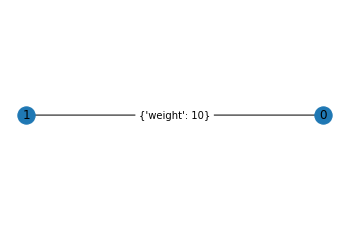

In [15]:
g = neptune.graphTraversal()

req_evaluation = req_evaluator.evaluate_req_by_id(g, 
                                 '_4663af6e-6265-438d-87b8-74e1550518bf__906_296b9968-fc8e-4101-950d-cec5eed188a1_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311-slotvalue-0-literalstring', 
                                 ref_targets,
                                 pprint=True)
req_evaluation.insert_references(insert_blocks, insert_query)

Available methods for `req_evaluation` are:
- .get_matches()
- .get_allocations()
- .display_match_subgrap()

In [13]:
req_evaluation.get_matches()

{117: {'token': {'text': 'the Data Management System',
   'pos': 'PROPN',
   'token_id': 117},
  'model_element': {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_16566_c270fe21-19e7-4d0d-aa3c-31b76ad6ca8b',
   'name': 'Data Management System'},
  'score': 0.0013642900507215298},
 124: {'token': {'text': 'Executive Software',
   'pos': 'PROPN',
   'token_id': 124},
  'model_element': {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_17_0_2_3_41e01aa_1382542702961_630808_58999',
   'name': 'Executive Software'},
  'score': -0.0},
 141: {'token': {'text': 'network', 'pos': 'PROPN', 'token_id': 141},
  'model_element': {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_18_0_6_876026b_1478280404909_609058_173008',
   'name': 'Network'},
  'score': 1.5543122344752193e-17},
 144: {'token': {'text': 'networking', 'pos': 'NOUN', 'token_id': 144},
  'model_element': {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/MMS_1456189351681_ad25f82c-607f-4103-83b1-75f605015749',
   '

In [ ]:
req_evaluator.get_requirement_by_id('_831_331c90b6-9e17-4c46-8530-0fc345e0a22f_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311-slotvalue-0-literalstring')

# MISCELLANEOUS 

In [16]:
summit='_4663af6e-6265-438d-87b8-74e1550518bf__65_6314a138-53b9-42a5-b488-9c23967ed889'
enclosure='_18_0_6_f1d0357_1490143302007_461579_179266'
mirror='_18_5_2_e64033a_1509475358071_810923_58742'
aps_user='_17_0_2_3_41e01aa_1389730769202_855584_72742'
aps_mission='_17_0_2_3_41e01aa_1389728637481_651557_61606'
usr_part_aps_mission='_17_0_2_3_41e01aa_1389731842407_88153_73842'
value_aps_mission='_18_0_2_baa02e2_1421376436201_767368_80540'

In [17]:
from req_analysis.libs.neptune_wrapper import get_type_from_part_properties

In [18]:
g = neptune.graphTraversal()
g.V(aps_mission).toList()

gremlin: ws://100.65.51.106:8182/gremlin


[v[_17_0_2_3_41e01aa_1389728637481_651557_61606]]

In [ ]:
g = neptune.graphTraversal()
get_type_from_part_properties(g, aps_mission)